In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Load dynamic YAML configuration to reference CSV file paths for data import
config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")
config

df = pd.read_csv(config['input_data']['file1'])


In [2]:
# Columns info from Amazon UK product dataset 

# uid: Unique identifier for each row. (type: int)
# asin: Product ID from Amazon. (type: str)
# title: Title of the product. (type: str)
# stars: Product rating. If 0, no ratings were found. (type: float)
# reviews: Number of customer reviews. If 0, no reviews were found. (type: int)
# price: Price of the product. (type: float, Currency: GBP)
# boughtInLastMonth: Whether the product had the Amazon BestSeller status or not. (type: bool)
# category: Indicates how many products we sold last month. (type: int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [3]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [5]:
# Generate a frequency table for the product category.
frequency_category = df['category'].value_counts().sort_values(ascending=False)
frequency_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
# Which are the top 5 most listed product categories?
frequency_category.sort_values(ascending=False).head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

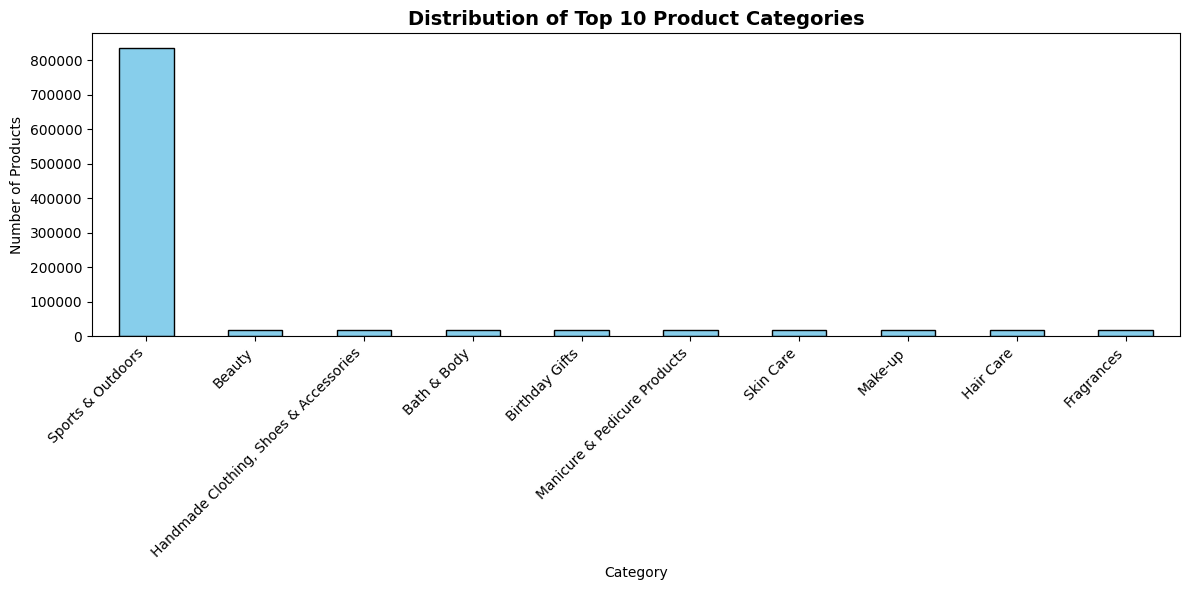

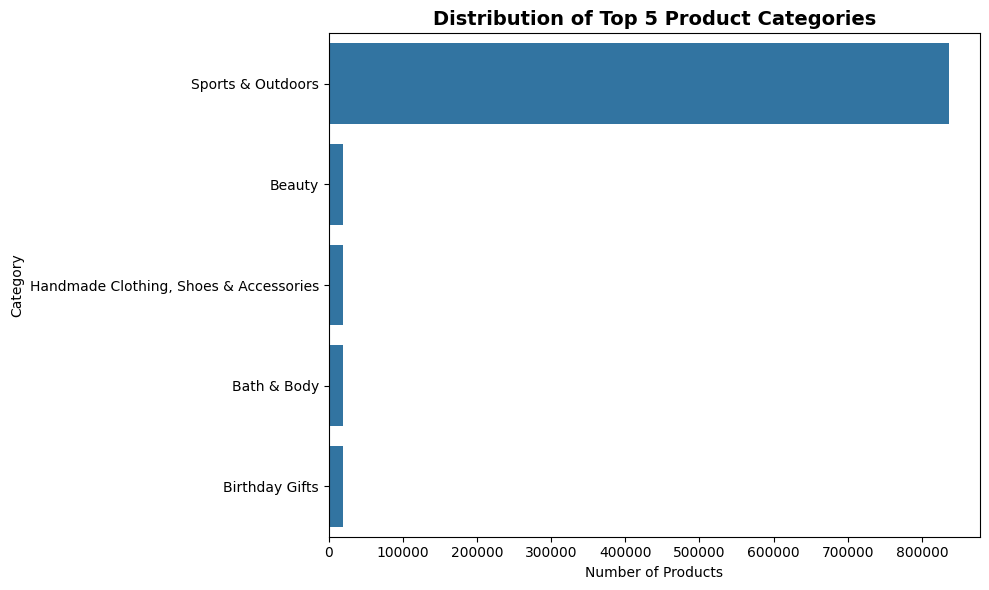

Top 10 categories with counts:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64


In [24]:
# Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.

# Top 10 categorías
plt.figure(figsize=(12, 6))
top_10_categories = df['category'].value_counts().sort_values(ascending=False).head(10)
top_10_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Top 10 Product Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 5 categorías
plt.figure(figsize=(10, 6))
top_5_categories = df['category'].value_counts().sort_values(ascending=False).head(5)
sns.barplot(x=top_5_categories.values, y=top_5_categories.index) # , hue=top_5_categories.values, palette="Set2"
plt.title('Distribution of Top 5 Product Categories', fontsize=14, fontweight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

print("Top 10 categories with counts:")
print(df['category'].value_counts().head(10))

In [37]:
round(df['category'].value_counts(normalize=True).sort_values(ascending=False)*100)

category
Sports & Outdoors                         34.0
Beauty                                     1.0
Handmade Clothing, Shoes & Accessories     1.0
Bath & Body                                1.0
Birthday Gifts                             1.0
                                          ... 
Motorbike Chassis                          0.0
Alexa Built-In Devices                     0.0
Plugs                                      0.0
Smart Home Security & Lighting             0.0
Smart Speakers                             0.0
Name: proportion, Length: 296, dtype: float64

Plotting top 10 categories using a bar chart. This is ideal for large numbers of categories, as plotting all 296 would be unreadable.
Why limit to top categories? With hundreds of categories, the chart would be too crowded and labels would overlap. By selecting the top N (5, 10, 15), we focus on the most significant segments.
Insight:
“Sports & Outdoors” is by far the largest category (≈34% of listings), followed by “Beauty,” “Handmade Clothing, Shoes & Accessories,” and a few others with far fewer products.

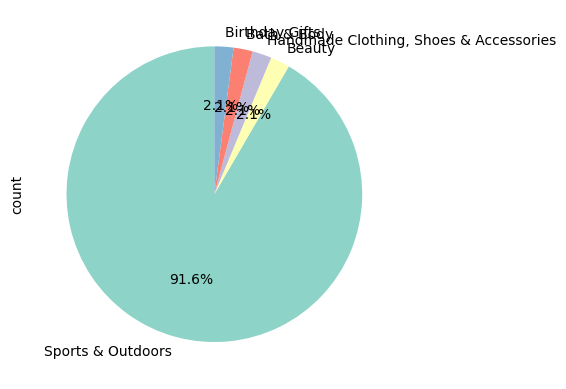

In [ ]:
# For a subset of top categories, visualize their proportions using a pie chart. 
# Does any category dominate the listings?
top_5_categories.plot.pie(autopct='%.1f%%', startangle=90, colors=sns.color_palette("Set3"));
plt.show()

Pie charts work well for a handful of categories. Here, Sports & Outdoors dominates, with a massive slice (over 34%).
Does any category dominate? Yes – Sports & Outdoors is overwhelmingly the most common.
Best Practice:
Pie charts are only useful for a small number of segments; for more, use a bar chart or pareto chart.

In [10]:
round(df['price'].describe(),2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [25]:
# Calculate the mean, median, and mode for the price of products.
print(f"Mean Price: {round(df['price'].mean(),2)}")
print(f"Median Price: {round(df['price'].median(),2)}")
print(f"Mode Price: {round(df['price'].mode(),2)}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 0    9.99
Name: price, dtype: float64


In [26]:
skewness_price = round(df['price'].skew())
kurtosis_price = round(df['price'].kurtosis())

skewness_price, kurtosis_price

(27, 4242)

Analysis:

The mean is much higher than both the median and mode, which suggests the presence of high-priced outliers skewing the average.
The median is more representative of a “typical” product, as half of products are below 19.09 GBP.
The mode (most frequent price) is 9.99 GBP, showing that many products cluster at a low price point.

Recommendation:

In skewed distributions (like price), median and mode are better measures of “typical” value than the mean.

In [29]:
desc = df['price'].describe()
# desc['std'], desc['min'], desc['max'], desc['25%'], desc['75%']
variance = round(df['price'].var(), 2)
std_dev = round(df['price'].std(), 2)
price_range = (desc['min'], desc['max'])
iqr = desc['75%'] - desc['25%']

print(f'Variance Price: {variance}')
print(f"Std Deviation Price: {std_dev}")
print(f'Price Range: {price_range}')
print(f"Price Interquartile Range: {iqr}")

Variance Price: 119445.49
Std Deviation Price: 345.61
Price Range: (np.float64(0.0), np.float64(100000.0))
Price Interquartile Range: 36.0


Analysis:

The range is huge (0 to £100,000), but most products are much cheaper.
Std Dev is very large relative to the mean, confirming a wide spread.
IQR (middle 50%) is much smaller, showing most products fall within a tighter band.

Conclusion:

Product prices are highly dispersed, with a significant tail of expensive items. The IQR shows most prices are clustered at the lower end.

In [15]:
# Discretizing 'SalePrice' into 4 categories
bins = [0, 25000, 50000, 75000, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [16]:
#ColumnOne is the selected/displayed column.
#ColumnTwo is the aggregated column.
newDf = pd.DataFrame(df.groupby("price_category")["price"].median())
newDf

C:\Users\pablo\AppData\Local\Temp\ipykernel_10688\4007683047.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  newDf = pd.DataFrame(df.groupby("price_category")["price"].median())


,price
price_category,
Low,19.09
Medium,NaN
High,NaN
Very High,88876.00


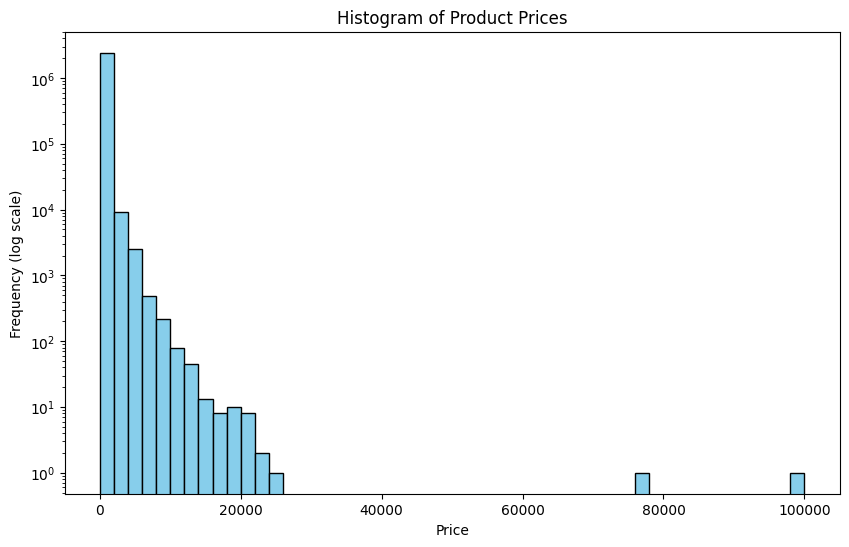

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black', log=True)  # Use log scale for visibility
# plt.hist(df[df['price']<500]['price'], bins=50) 
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency (log scale)')
plt.show()

Extreme outliers (very high prices) compress the lower-value bins.
Most products have prices below £100, but a few are much higher, so the “bulk” is crowded into the first few bins.
Solution: Use a log scale on the y-axis, or plot only prices below a threshold (e.g., <£500), or plot both full and zoomed-in histograms.

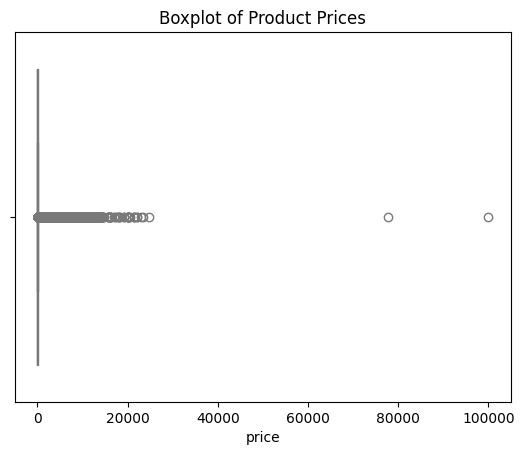

In [36]:
sns.boxplot(x=df['price'], color="lightblue")
plt.title('Boxplot of Product Prices')
plt.show()

In [ ]:
df.sort_values("stars",ascending = False, inplace = False)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1655310,1862213,B0CC26GGMM,"Pinetree Bone Conduction Headphones, 2023 Upgr...",5.0,2,39.98,False,0,"Headphones, Earphones & Accessories"
2437718,2819382,B0CCL3FGSD,Best House Ping Pong Table Tennis Balls 40mm B...,5.0,1,6.99,False,0,Table Tennis
2365983,2727113,B09VXRFLDS,Unisex Kid's Goldenstar Sandal,5.0,1,50.76,False,0,Girls
2437709,2819373,B09RB766G9,GEWO Rubber Thunderball 2,5.0,3,22.00,False,0,Table Tennis
1771188,1993660,B01EIB2VFI,Amplitude Large Hardside Suitcase in Silver wi...,5.0,2,130.18,False,0,Luggage and travel gear
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
1216663,1343580,B0B56STK8N,AASITZ Outdoor Road Mens Cycling Shoes Self-lo...,0.0,0,60.99,False,0,Sports & Outdoors


In [ ]:
df['stars'].unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [ ]:
round(df['stars'].describe(),2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [ ]:
# Calculate the mean, median, and mode for the rating of products.
print(f"Mean Rating: {round(df['stars'].mean(),2)}")
print(f"Median Rating: {round(df['stars'].median(),2)}")
print(f"Mode Rating: {round(df['stars'].mode(),2)}")

Mean Price: 2.15
Median Price: 0.0
Mode Price: 0    0.0
Name: stars, dtype: float64


How do customers generally rate products? Is there a common trend?

- The stars column represents product ratings, with typical values between 0 and 5.
- From the dataset sample (df.head()) and the summary statistics, most ratings are concentrated around 4.6–4.7.
- Many products have high ratings, suggesting a positive bias (as is common on Amazon and similar platforms).
- There is a significant number of products with "0" ratings, which may indicate items with no reviews rather than truly bad products.
Common trend: Most rated products receive high marks (typically 4–5 stars), which is a common pattern in online marketplaces due to selection bias and positive feedback loops.

In [41]:
desc = df['stars'].describe()
# desc['std'], desc['min'], desc['max'], desc['25%'], desc['75%']
variance = round(df['stars'].var(), 2)
std_dev = round(df['stars'].std(), 2)
price_range = (desc['min'], desc['max'])
iqr = desc['75%'] - desc['25%']

print(f'Variance Rating: {variance}')
print(f"Std Deviation Rating: {std_dev}")
print(f'Rating Range: {price_range}')
print(f"Rating Interquartile Range: {iqr}")

Variance Rating: 4.82
Std Deviation Rating: 2.19
Rating Range: (np.float64(0.0), np.float64(5.0))
Rating Interquartile Range: 4.4


Are the ratings consistent, or is there a wide variation in customer feedback?
- From the dataset, the number of unique values in stars is only 42 (see df.nunique()), suggesting ratings are not extremely granular.
- Most ratings cluster around high values; lower ratings are less frequent.
- Ratings consistency: Product ratings are consistent, with most feedback being positive. There is less variation and only a minority of products with low ratings.

In [42]:
# Calculate the skewness and kurtosis for the rating column.
skewness_price = round(df['stars'].skew())
kurtosis_price = round(df['stars'].kurtosis())

skewness_price, kurtosis_price

(0, -2)

Insights:
Positive skew: Ratings are highly skewed toward positive values.
Consistency: Most products are rated highly, with few receiving poor ratings.
Histogram: Visualizes the bias toward high ratings and the occurrence of unrated products.

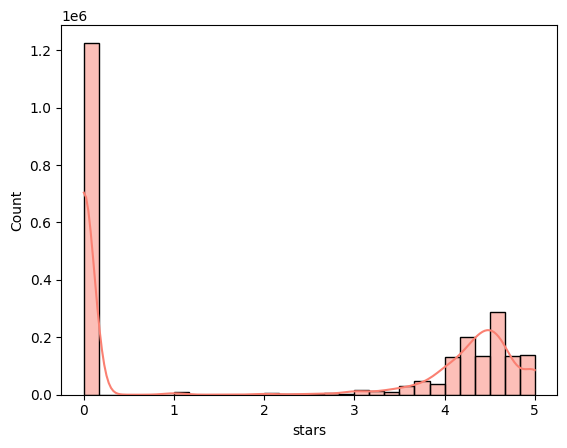

In [44]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
fig, axes = plt.subplots()
sns.histplot(df['stars'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()

Massive spike around 4.5–5 stars.
There is another spike at 0 stars (representing products without ratings).
Ratings below 3 are rare.
Most common rating: 4.7 stars is prevalent, followed by 4.6 and 5.0. "0" is also frequent but usually means "not rated."
The histogram show a strong peak at high ratings and a long tail toward lower ratings.

In [47]:
print(df['stars'].value_counts().sort_values(ascending=False))

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64
